In [10]:
# 營業收入
import pandas as pd
import json
import os
CUR_DIR = os.getcwd()
FIN_DIR = os.path.join(os.path.dirname(CUR_DIR), "financial_statements")
# 營業收入：pstage => financial_report
df = pd.read_parquet(f"{FIN_DIR}/pstage/financial_report.parquet", engine='pyarrow')
pmart = df[['財務資料日', '證券碼','營業收入淨額', "營業毛利率"]]
pmart.to_parquet(f"{FIN_DIR}/pmart/net_revenue.parquet")

In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
CUR_DIR = os.getcwd()
FIN_DIR = os.path.join(os.path.dirname(CUR_DIR), "financial_statements")
# 營業收入：pstage => financial_report
df = pd.read_parquet(f"{FIN_DIR}/pstage/financial_report.parquet", engine='pyarrow')
list_ = ['2002', "2006"]
pmart = df[['財務資料日', '證券碼', '存貨週轉率(次)', '應收帳款及票據', '營業收入淨額']]
filtered_pmart = pmart[pmart['證券碼'].isin(list_)]
filtered_pmart

,財務資料日,證券碼,存貨週轉率(次),應收帳款及票據,營業收入淨額
13227,2005-06-01,2002,2.30,10006977.0,152592086.0
13228,2005-12-01,2002,2.33,9003770.0,131523070.0
13229,2006-06-01,2002,1.93,8724438.0,129365757.0
13230,2006-12-01,2002,1.89,10173393.0,149145329.0
13231,2007-06-01,2002,2.02,10812474.0,161516943.0
...,...,...,...,...,...
13362,2022-12-01,2006,0.62,3589255.0,14049423.0
13363,2023-03-01,2006,0.62,3839988.0,13621958.0
13364,2023-06-01,2006,2.96,4164821.0,15813857.0
13365,2023-09-01,2006,2.68,4145214.0,15015953.0


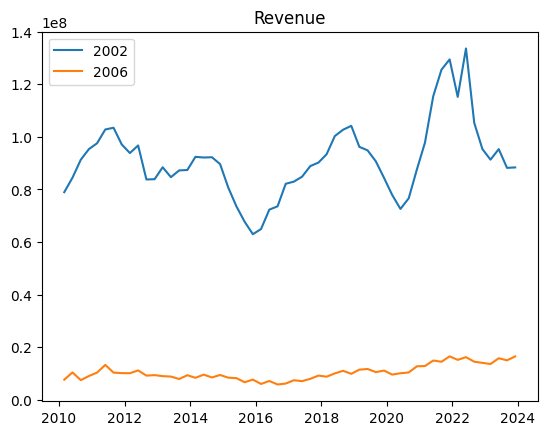

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for stock in list_:
    data = filtered_pmart[filtered_pmart['證券碼'] == stock]
    data = data[data['財務資料日'] >= "2010-01-01"]
    ax[0, 0].plot(data['財務資料日'], data['存貨週轉率(次)'], label=stock)
    ax[0, 0].set_title("turnover rate")
    ax[0, 0].legend()

for stock in list_:
    data = filtered_pmart[filtered_pmart['證券碼'] == stock]
    data = data[data['財務資料日'] >= "2010-01-01"]
    plt.plot(data['財務資料日'], data['營業收入淨額'], label=stock)
    ax[0, 1].plot(data['財務資料日'], data['應收帳款及票據'], label=stock)
    ax[0, 1].set_title("Account Receivable")
    ax[0, 1].legend()

plt.tight_layout()

plt.title("Revenue")
plt.legend()
plt.show()

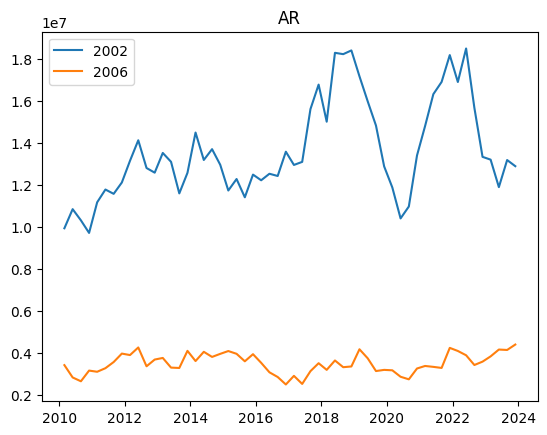

In [12]:
for stock in list_:
    data = filtered_pmart[filtered_pmart['證券碼'] == stock]
    data = data[data['財務資料日'] >= "2010-01-01"]
    plt.plot(data['財務資料日'], data['應收帳款及票據'], label=stock)
plt.title("AR")
plt.legend()
plt.show()

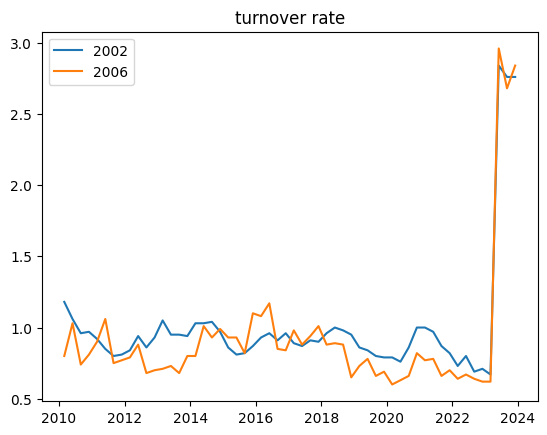

In [13]:
for stock in list_:
    data = filtered_pmart[filtered_pmart['證券碼'] == stock]
    data = data[data['財務資料日'] >= "2010-01-01"]
    plt.plot(data['財務資料日'], data['存貨週轉率(次)'], label=stock)
plt.title("turnover rate")
plt.legend()
plt.show()